<font  style = "font-weight: bold; color:blue; font-size:2.5em;">Data Visualization on Honey Production dataset

## Domain: Food and agriculture

## Context:

In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.

## Objective:

The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions.

## Attribute Information:

1. numcol : Number of honey producing colonies.
2. yield percol :  Honey yield per colony. (Unit is pounds)
3. total prod : Total production (numcol x yieldpercol). (Unit is pounds)
4. price per lb : Refers to average price per pound based on expanded sales. Unit is dollars.
5. prodvalue : Value of production (total prod x priceperlb). Unit is dollars.
6. Stocks :  Refers to stocks held by producers. Unit is pounds
7. Year : Calendar year.
8. State : Different states' names.

<font  style = "font-weight: bold;  font-size:1.9em;">1. Import required libraries and read the dataset.

In [126]:
# importing reqired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [127]:
# reading the file "honeyproduction.csv"
df = pd.read_csv('honeyproduction.csv')
df.head(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


<font  style = "font-weight: bold;  font-size:1.9em;">2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [128]:
# Randomly checking few rows by using Sample function 
df.sample(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
547,AZ,23000.0,53,1219000.0,427000.0,1.55,1889000.0,2011
145,MD,4000.0,46,184000.0,55000.0,1.60,294000.0,2001
253,TX,140000.0,67,9380000.0,1126000.0,1.40,13132000.0,2003
456,SD,225000.0,95,21375000.0,11970000.0,1.34,28643000.0,2008
131,AR,50000.0,98,4900000.0,1617000.0,0.65,3185000.0,2001
382,WI,64000.0,93,5952000.0,2500000.0,1.12,6666000.0,2006
199,NY,60000.0,98,5880000.0,2470000.0,1.25,7350000.0,2002
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
73,OK,6000.0,45,270000.0,49000.0,1.34,362000.0,1999
56,KY,3000.0,50,150000.0,12000.0,1.24,186000.0,1999


In [129]:
# checking the shape of the dataset
df.shape

(626, 8)

In [130]:
# cheking breif information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [131]:
# checking if there are any null values
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

there is no null values present in this dataset

In [132]:
# cheking the unique values present in this dataset. ignoring null values
df.nunique()

state           44
numcol         148
yieldpercol     95
totalprod      517
stocks         500
priceperlb     210
prodvalue      589
year            15
dtype: int64

In [133]:
# checking if there are ant duplicated values are present in this dataset
df.duplicated().sum()

0

<font  style = "font-weight: bold;  font-size:1.9em;">3. Display the percentage distribution of the data in each year using the pie chart.

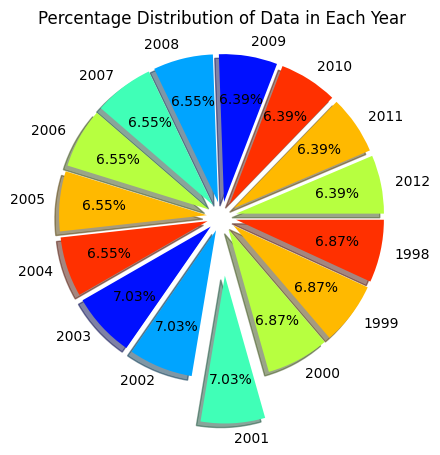

In [134]:
year_perdist = df.groupby('year').size()/len(df)*100

explode_pie = (0.1,0.1,0.1,0.4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.title('Percentage Distribution of Data in Each Year')
plt.pie(year_perdist,labels = year_perdist.index, autopct="%1.2f%%",explode=explode_pie,shadow=True,counterclock=False,pctdistance= 0.7)
plt.show()

<font  style = "font-weight: bold;  font-size:1.9em;">4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

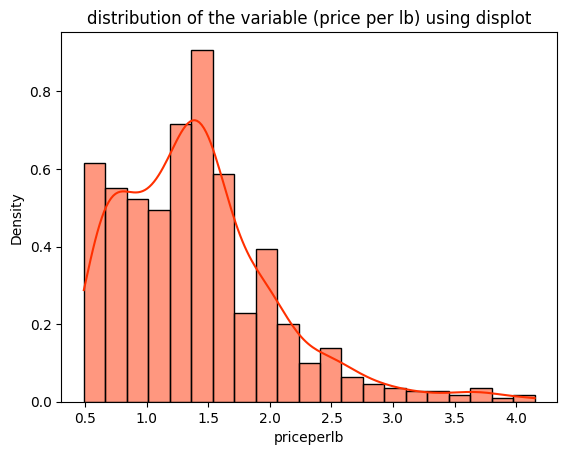

In [135]:
sns.histplot(df['priceperlb'], kde=True, stat="density")
plt.title("distribution of the variable (price per lb) using displot")
plt.show()

#### inference :

* The price per lb indicates the average price of honey per pound based on sales. It can be inferred that with increase in price per lb the sales decreases.

<font  style = "font-weight: bold;  font-size:1.9em;">5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.

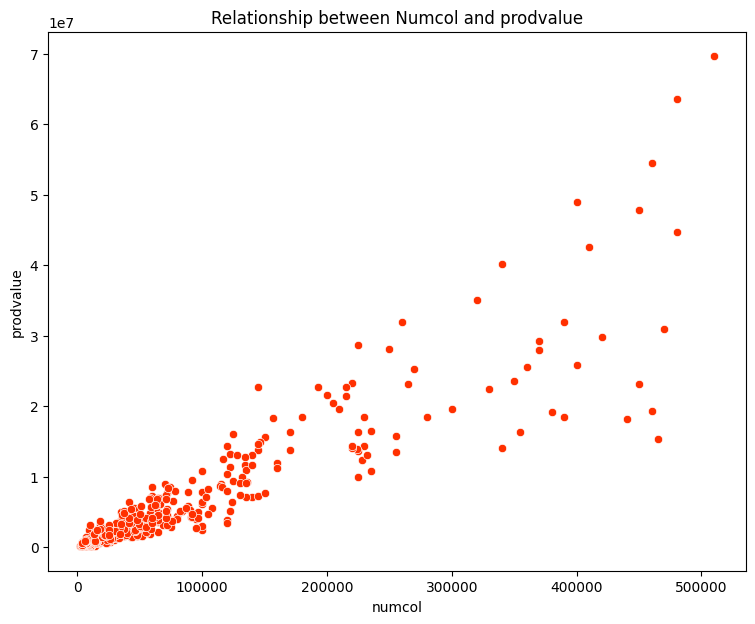

In [136]:
plt.figure(figsize=(9,7))
sns.set_palette('jet_r')
sns.scatterplot(x= df['numcol'], y= df['prodvalue'] )
plt.title('Relationship between Numcol and prodvalue')
plt.show()

#### inference :

* from the above Scatter plot, it is saying that the variables prodvalue and numcol are directly proportional, and having a strong Positive relationship between these two variables, we can say  "an Increase in number of colonies to increase the production of honey "".   

<font  style = "font-weight: bold;  font-size:1.9em;">6. Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your findings.

C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


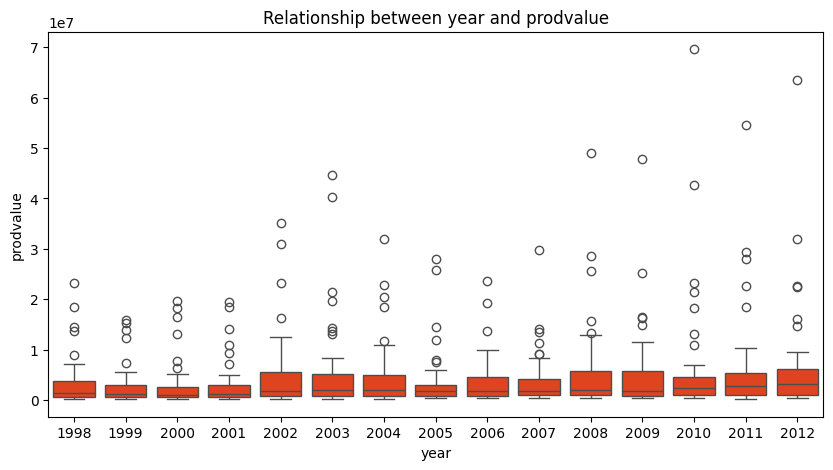

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(df,x= 'year', y= 'prodvalue' )
plt.title('Relationship between year and prodvalue')
plt.show()

#### Inference :

* BoxPlot is used to check if any outliers are present or not in the dataset, It can be observed that as the year     passes the sales increases and the median sales increased too. The range of the feature has been increasing every   year and the value lies between 0.1 and 0.5 from the initial year(1998) to the last year(2012),and we can see       there number of outliers are more in between year 2008 to 2012

<font  style = "font-weight: bold;  font-size:1.9em;">7. Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

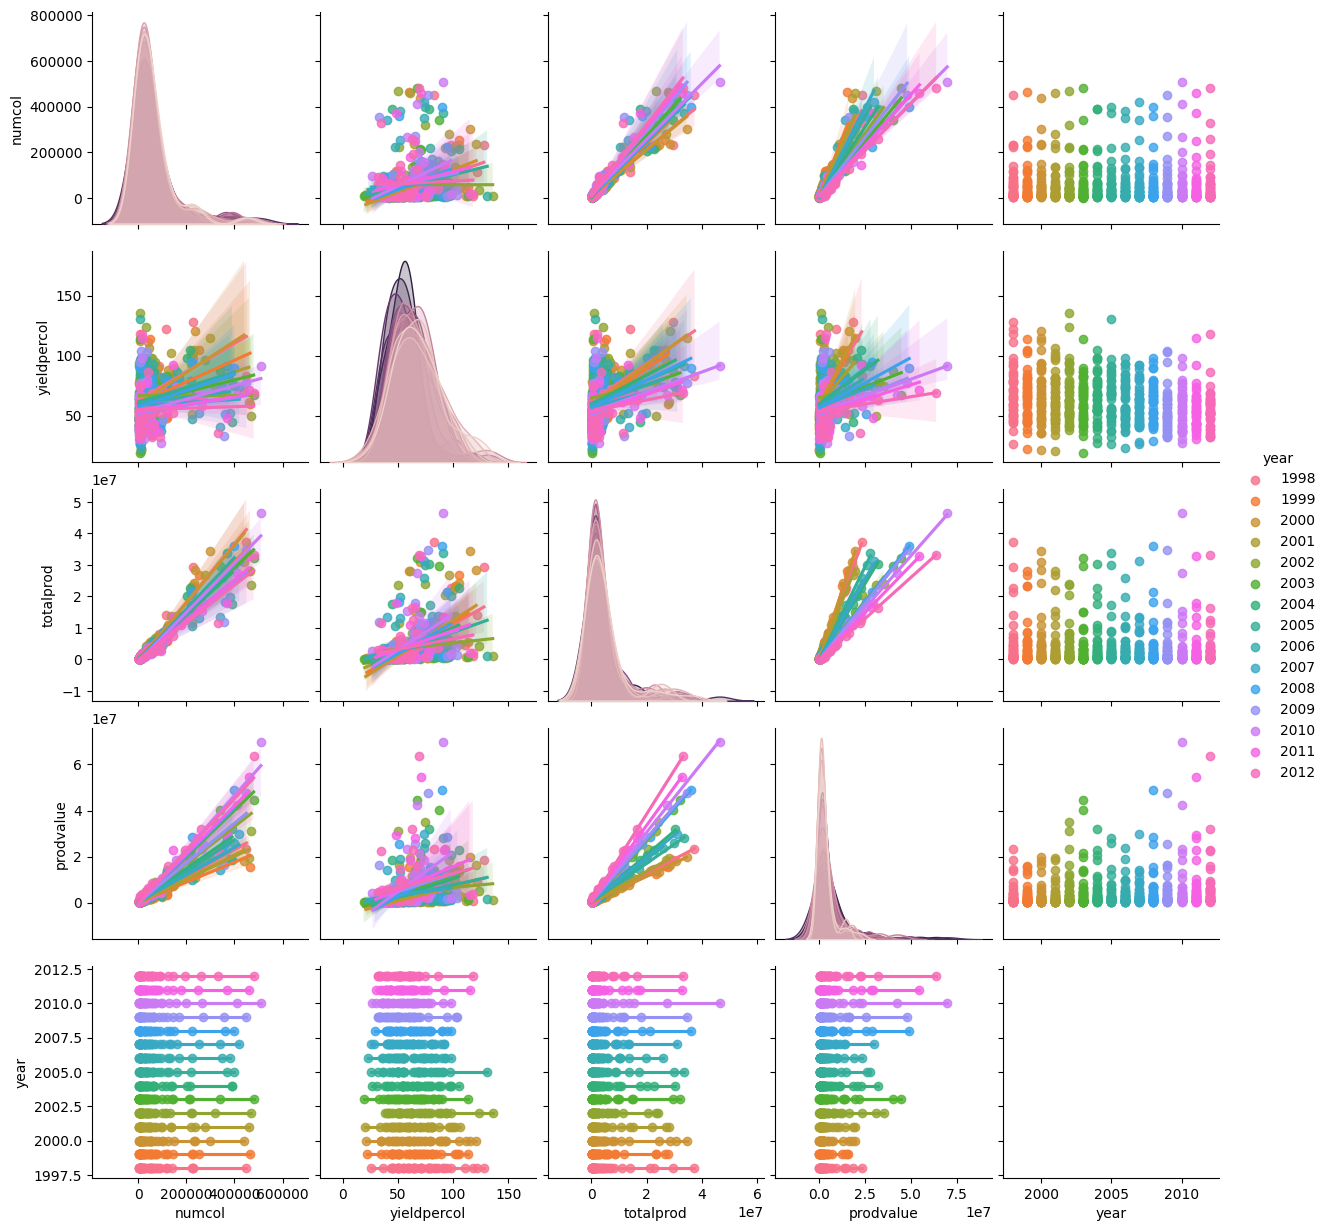

In [146]:
col = ['numcol','yieldpercol','totalprod','prodvalue','year']
sns.pairplot(df, vars = col, hue='year' ,kind = 'reg')

#### inference :

* The Pairplot shows us the distribution  of single variables and the relationship between two variables. It is       also used to find the correlation between variables.The diagnal is a histogram showing the distribution and the     lower triangle is the scatter plot and the upper triangle is a mirror image of the lower.

  The pairplot presented above shows that there is a direct relation between numcol and totalprod, yieldpercol and    prodvalue, and totalprod and prodvalue. The Features such as numcol,totalprod and prodvalue are positively skewed   in nature, whereas yieldpercol is normally distributed.

<font  style = "font-weight: bold;  font-size:1.9em;">8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue')

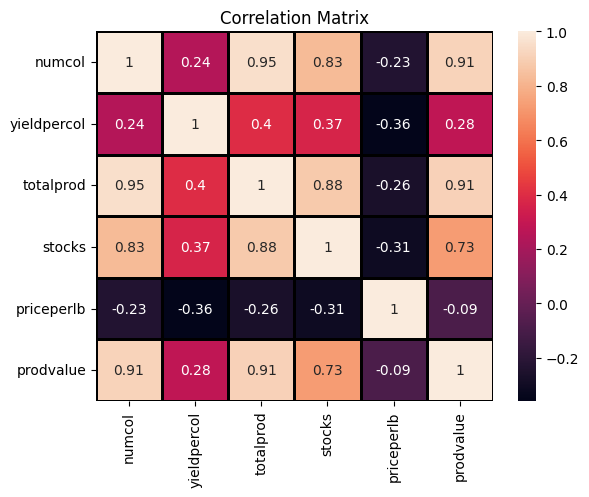

In [177]:
# creating colums variables 
cols= ['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']


sns.heatmap(df[cols].corr(), annot=True,linewidths=2,linecolor='black')
plt.title("Correlation Matrix")
plt.show()

#### Inference :

- From the Heatmap we can infer the relationship between two variables.
- 'numcol' is positively correlated with 'totalprod' , 'prodvalue' , 'stocks'.
- 'totalprod' is positively correlated with 'prodvalue' , 'stocks'.
- 'stocks' is positively correlated with 'prodvalue'.
- The above variable are Directly proportional to each other.
- 'yieldpercol' has less positive relationship with other variables.  
- 'priceperlb' indicates a negatively correlated with every other variable, indicating a inversely proportional.